# **Checkpoint 7 - Missing Data and Numeric/Numeric Bivariate Data**

**Question 1:** 

What columns have missing data? 

Answer: Lot Frontage, GarageYrBlt, OpenPorchSF


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
from sklearn.metrics import r2_score

df = pd.read_csv("https://www.dropbox.com/s/blcmovobej56vyt/housing_numeric.csv?dl=1")
df.isnull().sum()

Id                 0
MSSubClass         0
LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
ExterQual          0
ExterCond          0
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
CentralAir         0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
TotalSF            0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
PavedDrive         0
WoodDeckSF         0
OpenPorchSF      656
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SalePrice          0
dtype: int64

**Question 2:** 

You talked with a business manager who is very familiar with this data. She explained that if the open porch square feet (OpenPorchSF) is empty or null, that means they don't have an open porch (the square feet is 0). The same thing is true with Lot Frontage (if the Lot Frontage is null that means the lot frontage is 0 square feet). Clean the data to reflect that piece of information.

In [ ]:
df['OpenPorchSF'].fillna(0, inplace = True)
df['LotFrontage'].fillna(0, inplace = True)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 42 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   OverallQual    1460 non-null   int64  
 5   OverallCond    1460 non-null   int64  
 6   YearBuilt      1460 non-null   int64  
 7   YearRemodAdd   1460 non-null   int64  
 8   MasVnrArea     1452 non-null   float64
 9   ExterQual      1460 non-null   object 
 10  ExterCond      1460 non-null   object 
 11  BsmtFinSF1     1460 non-null   int64  
 12  BsmtFinSF2     1460 non-null   int64  
 13  BsmtUnfSF      1460 non-null   int64  
 14  TotalBsmtSF    1460 non-null   int64  
 15  CentralAir     1460 non-null   object 
 16  1stFlrSF       1460 non-null   int64  
 17  2ndFlrSF       1460 non-null   int64  
 18  LowQualF

**Question 3:** 

After talking with a business manager agian, you learn that the Masonry Veneer Area (MasVnrArea) is the outer layer of brick or stone on the home. You also learn that, unlike the open porch square feet or the Lot Frontage, a missing value does NOT indicate that their isn't any masonry veneer. Instead, the missing value means there was a user error of some sort. You and your business manager decide to delete the rows that have missing values in the masonry veneer area column. Clean the data to reflect this piece of information.

In [ ]:
df.dropna(subset = ['MasVnrArea'], inplace = True)
df.isnull().sum()

Id                0
MSSubClass        0
LotFrontage       0
LotArea           0
OverallQual       0
OverallCond       0
YearBuilt         0
YearRemodAdd      0
MasVnrArea        0
ExterQual         0
ExterCond         0
BsmtFinSF1        0
BsmtFinSF2        0
BsmtUnfSF         0
TotalBsmtSF       0
CentralAir        0
1stFlrSF          0
2ndFlrSF          0
LowQualFinSF      0
TotalSF           0
BsmtFullBath      0
BsmtHalfBath      0
FullBath          0
HalfBath          0
BedroomAbvGr      0
KitchenAbvGr      0
TotRmsAbvGrd      0
Fireplaces        0
GarageYrBlt      81
GarageCars        0
GarageArea        0
PavedDrive        0
WoodDeckSF        0
OpenPorchSF       0
EnclosedPorch     0
3SsnPorch         0
ScreenPorch       0
PoolArea          0
MiscVal           0
MoSold            0
YrSold            0
SalePrice         0
dtype: int64

**Question 4:** 

After talking with your business manager, you decided just impute the missing values in the Garage Years Built column (GarageYrBlt) with the average year the garages in the dataset were built. Clean the data to reflect his piece of information.

In [ ]:
df['GarageYrBlt'].fillna(df['GarageYrBlt'].mean(), inplace = True)
df.isnull().sum()

Id               0
MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
ExterQual        0
ExterCond        0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
CentralAir       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
TotalSF          0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
PavedDrive       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
SalePrice        0
dtype: int64

**Question 5**: 

Create a new dataframe called df_small. The df_small dataframe should contain the following columns from the df dataframe:

LotFrontage

LotArea

OverallQual

TotalBsmtSF

FullBath

MasVnrArea

OpenPorchSF

SalePrice

This smaller dataframe will allow for a more manageable correlation matrix.

In [ ]:
df_small = pd.DataFrame()


df_small['LotFrontage'] = df['LotFrontage']
df_small['LotArea'] = df['LotArea']
df_small['OverallQual'] = df['OverallQual']
df_small['TotalBsmtSF'] = df['TotalBsmtSF']
df_small['FullBath'] = df['FullBath']
df_small['MasVnrArea'] = df['MasVnrArea']
df_small['OpenPorchSF'] = df['OpenPorchSF']
df_small['SalePrice'] = df['SalePrice']

df_small

,LotFrontage,LotArea,OverallQual,TotalBsmtSF,FullBath,MasVnrArea,OpenPorchSF,SalePrice
0,65.0,8450,7,856,2,196.0,61.0,208500
1,80.0,9600,6,1262,2,0.0,0.0,181500
2,68.0,11250,7,920,2,162.0,42.0,223500
3,60.0,9550,7,756,1,0.0,35.0,140000
4,84.0,14260,8,1145,2,350.0,84.0,250000
...,...,...,...,...,...,...,...,...
1455,62.0,7917,6,953,2,0.0,40.0,175000
1456,85.0,13175,6,1542,2,119.0,0.0,210000
1457,66.0,9042,7,1152,2,0.0,60.0,266500
1458,68.0,9717,5,1078,1,0.0,0.0,142125


**Question 6:** 

Create a correlation matrix using all the columns in the df_small dataframe. Set that correlation matrix on a heat map. Use the correlation matrix or any other python tool to answer the following questions. In code block(s) below, show how you arrived at these answers. 

1. What variable has the greatest correlation with the Sale Price of a home?

2. What variable has the smallest correlation with the Sale Price of a home?

3. Do any variables have a negative correlation with the Sale Price?

Answer 1: OverallQual

Answer 2: LotArea

Answer 3: No

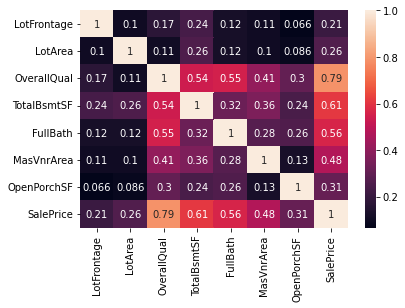

In [ ]:
import seaborn as sns


correlation_mat = df_small.corr()

sns.heatmap(correlation_mat, annot = True)

**Question 7**: 

Create a scatter plot where OverallQual is the x axis and SalePrice is the y axis. Plot the linear regression line. Include axis labels and a title. Plot on the image as text the r value, p-value, r square value, and linear regression equation.

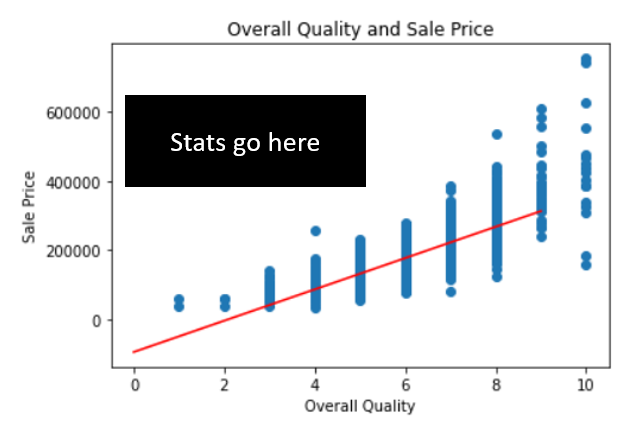

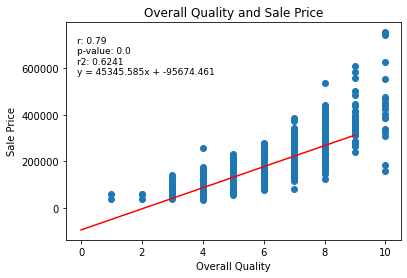

In [ ]:

#Plot Scatter Plot --> plt.scatter(x axis variable, y axis variable)
plt.scatter(df_small['OverallQual'], df_small['SalePrice'])

#Create X Label --> plt.xlabel('x label name')
plt.xlabel('Overall Quality')

#Create Y Label --> plt.ylabel('y label name')
plt.ylabel('Sale Price')

#Create Title --> plt.title('Title Name')
plt.title('Overall Quality and Sale Price')

#text = (f'Average for 2000: {average_2000} \n \nAverage for 2019: {average_2019}')


#Calculate the r value, p value, r2 value and linear regression line. Same as above
corr = stats.pearsonr(df_small['OverallQual'], df_small['SalePrice'])
model = np.polyfit(df_small['OverallQual'], df_small['SalePrice'], 1)
predict = np.poly1d(model)
r2 = r2_score(df_small['SalePrice'], predict(df_small['OverallQual']))


r_var = (str(round(corr[0], 4)))
p_value_var = (str(round(corr[1], 6)))
r2_var = (str(round(r2,4)))
y_var = (str(round(model[0],3)))
x_var = (str(round(model[1],3)))




text = ('r: ' + r_var + '\np-value: '+ p_value_var + '\nr2: ' + r2_var + '\ny = ' + y_var + 'x + ' + x_var)

plt.text(.15, .70, text, fontsize = 9, transform = plt.gcf().transFigure)

#Plot the Linear Regression Equation

#Get the range of the x axis (start at the min x value you want shown and go to the max TotalSF). 
x_lin_reg = range(0,df_small.OverallQual.max())

#Get the range of the predicted y values (pass the actual x values into the predict 'function' you made)
y_lin_reg = predict(x_lin_reg)

#plot the linear regression line. The c = 'r' made the line a solide red line.
plt.plot(x_lin_reg, y_lin_reg, c = 'r')

#Show the plot and clear other settings (remove extra text above graph) -> plt.show()
plt.show()



**Question 8:** 

What do you learn about the relationship between Overall Quality and Sale Price from the stats and visualizations in question 7? Use the information gleaned from the r value, p-value, and r2 value. 

Answer: They are moderately positively correlated with statistical significance.


**Question 9:** 

Based on the Linear Regression Equation, what is the predicted sale price when the overall quality is 7?

Answer: $221,744.63

In [ ]:
print(round(45345.585 * 7 - 95674.461,2))

221744.63


**Question 10:** 

Create a joint plot with Overall Quality as the feature and Sale Price as the label. What variable (Overall Quality or Sale Price) is the most skewed?

Answer: Sale Price is the most skewed

import seaborn as sns

sns.jointplot(data=df_small, x="OverallQual", y="SalePrice", kind="scatter")

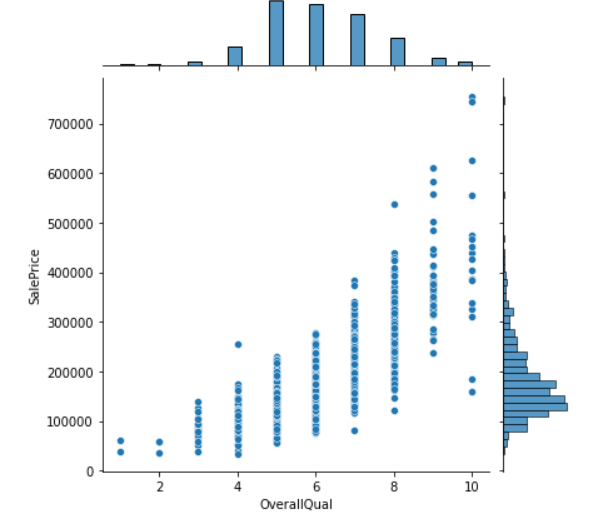

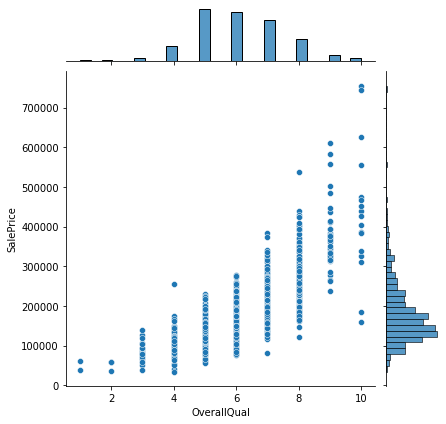

In [ ]:
import seaborn as sns

sns.jointplot(data=df_small, x="OverallQual", y="SalePrice", kind="scatter")



**Question 11:** 

Create a 4-D graph. Set the label as Sale Price. Set the x variable to the variable that has the highest correlation with Sale Price. Set the z variable to the variable that has the 2nd highest correlation with Sale Price. Set the color to the variable that has the 3rd highest correlation with Sale Price.

Describe 2 outlier points. What stands out? You don't need to statistically identify outliers, you can just visually identify a couple from the graph.

Answer: There is an Overall Quality 10 home in the top left portion that sold for 160K in spite of having a relatively large basement. There are also a couple of outliers that are 10 in quality and sold for over 700K in spite of having smaller basements. While there is a correlation between the square footage of basements and the overall sale price, the correlation does not always hold due to other variables at play (such as overall quality and perhaps having another floor entirely).

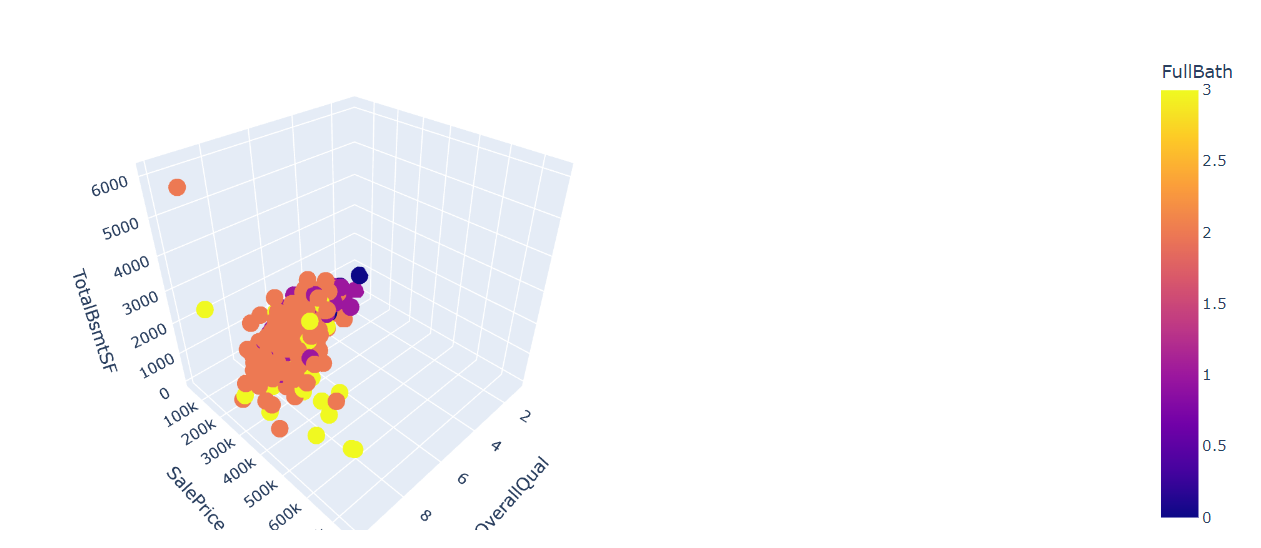

In [ ]:
import plotly.express as px

fig = px.scatter_3d(df_small, x = 'OverallQual', y = 'SalePrice', z = 'TotalBsmtSF', color = 'FullBath', size_max = 20,opacity = .5 )

fig.show()